In [17]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
########### mflow ############
import mlflow
import mlflow.sklearn
########### mflow ############

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sharelib import *
from report import *

import logging
from pathlib import Path
import json
import glob
import sys
import pickle

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

jenkinsURL = getArgs(1,"")
mlflowMinioFolder = getArgs(2,"")
mlflowTrainingFileLimit = int(getArgs(13,5))
jenkinsBuildID = getArgs(14,"1")

In [19]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata8' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        print(file)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)
        if (xcount == mlflowTrainingFileLimit):
            break

xcount:  1
rawdata8\ls.s3.03ce9eec-a45b-4df8-bd15-2a74f81abd46.2023-11-03T08.06.part306.txt
xcount:  2
rawdata8\ls.s3.0a57d240-f6f5-40c6-8f9f-649634a52718.2023-11-03T08.33.part397.txt
xcount:  3
rawdata8\ls.s3.146603d4-a733-4f1b-8aec-2aaec234e0f6.2023-11-03T08.09.part317.txt
xcount:  4
rawdata8\ls.s3.1e500c12-e337-4ebc-89f4-2411dfa053f4.2023-11-03T07.53.part256.txt
xcount:  5
rawdata8\ls.s3.4a6a66c6-b147-42f2-9802-39373813147b.2023-11-03T07.45.part225.txt


In [20]:
    countryMap = mapOfCountryDst()
    portMap = mapOfPort()
    
    print("-------------- Number of Country in Encoding --------------")
    print("country_key : ", len(countryMap.keys()))
    print("country_count : ", len(set(countryMap.values())))
    
    print("-------------- Number of Country in Encoding --------------")    
    print("-------------- Country in Encoding --------------")
    print(countryMap)
    print("-------------- Country in Encoding --------------")    
    print("-------------- Country in Encoding --------------")
    print(countryMap.keys())
    print(countryMap.values())
    print("-------------- Country in Encoding --------------")

    countrylist = listOfCountryDst()
    print("-------------- Number of Country in Encoding --------------")
    print(len(countrylist))
    print("-------------- Number of Country in Encoding --------------")

    for item in countrylist:
        if (item not in countryMap):
            print(item)
    
    print("-------------- Port Count --------------")
    print(portMap)
    print("-------------- Port Count --------------")  

-------------- Number of Country in Encoding --------------
country_key :  230
country_count :  226
-------------- Number of Country in Encoding --------------
-------------- Country in Encoding --------------
{'United States': 0, 'US': 0, 'Austria': 1, 'Thailand': 2, 'TH': 2, 'Brazil': 3, 'China': 4, 'Netherlands': 5, 'Singapore': 6, 'SG': 6, 'Japan': 7, 'Sweden': 8, 'United Kingdom': 9, 'Australia': 10, 'Asia Pacific Region': 11, 'Russian Federation': 12, 'Malaysia': 13, 'Korea Republic Of': 14, 'Hong Kong': 15, 'Canada': 16, 'Germany': 17, 'India': 18, 'France': 19, 'Italy': 20, 'Slovakia': 21, 'European Union': 22, 'Norway': 23, 'Ireland': 24, 'Indonesia': 25, 'Spain': 26, 'Israel': 27, 'Taiwan': 28, 'Switzerland': 29, 'South Africa': 30, 'Viet Nam': 31, 'Turkey': 32, 'Lao Peoples Democratic Republic': 33, 'Luxembourg': 34, 'Iran Islamic Republic Of': 35, 'Poland': 36, 'Belgium': 37, 'Mexico': 38, 'Finland': 39, 'Slovenia': 40, 'Argentina': 41, 'Uruguay': 42, 'Czech Republic': 43, 

In [31]:
    np.set_printoptions(threshold=sys.maxsize)
    
    # df_categories = df[df["ads_country_dst"].str.startswith(('1', '2', '3', '4', '5', '6', '7', '8', '9', '0')) == False] 
    df_categories = pd.concat([df["ads_country_dst"]], axis=1, sort=False,)
    print("-------------- Count Record --------------")
    print(df_categories.shape[0])
    print("-------------- Count Record --------------")
    print("-------------- Count Destination Country --------------")
    print(df_categories.value_counts().to_string())
    print("-------------- Count Destination Country --------------")

    print("-------------- Show Country Not in list --------------")
    print(df_categories[~df_categories['ads_country_dst'].isin(countryMap.keys())].value_counts().to_string())
    print("-------------- Show Country Not in list --------------")

    df_categories = df_categories.mask(~df_categories.isin(countryMap.keys()),'OTHER')
    
    X = df_categories.replace({'ads_country_dst': countryMap})
    print("-------------- Show X --------------")
    print(X)
    print("-------------- Show X --------------")
    # x_scaler = StandardScaler().fit(X)
    # print("Mean of x is:", x_scaler.mean_)
    # print("Variance of x is:", x_scaler.var_)
    # print("Standard deviation of x is:", x_scaler.scale_)
    # x_scaled = x_scaler.transform(X)
    # print(x_scaled)
    print("-------------- Port --------------")

    df_categories_port = df_categories
    df_categories = pd.concat([df_categories,df["ads_dst_port"]], axis=1, sort=False,)

    ads_dst_port = pd.concat([df["ads_dst_port"]], axis=1, sort=False,).astype(str)
    ads_dst_port = ads_dst_port.mask(~ads_dst_port.isin(portMap.keys()), 'OTHER')
    ads_dst_port = ads_dst_port.replace({'ads_dst_port': portMap})
    print(ads_dst_port)
    print("-------------- Port --------------")

    df_categories_port = pd.concat([df_categories_port,ads_dst_port], axis=1, sort=False,)
    X = pd.concat([X,ads_dst_port], axis=1, sort=False,)
    print("-------------- Show X --------------")
    print(X)    
    print("-------------- Show X --------------")
    
    normalPoint = 30
    mask = (X['ads_country_dst'] <= normalPoint) & (X['ads_dst_port'] == 0)
    # Create a new DataFrame 'df_new' with a column 'C'
    X_Test = pd.DataFrame({'test': [-1] * len(df)})
    X_Test.loc[mask, 'test'] = 1

    print("-------------- Show X_Test --------------")
    print(X_Test)
    print("-------------- Show X_Test --------------")
    

-------------- Count Record --------------
159987
-------------- Count Record --------------
-------------- Count Destination Country --------------
ads_country_dst                          
Thailand                                     89941
United States                                35628
Malaysia                                      3901
Singapore                                     3738
China                                         3569
Russian Federation                            3361
Japan                                         3233
Netherlands                                   3079
Canada                                        1579
France                                        1323
Germany                                        918
United Kingdom                                 843
Korea Republic Of                              705
Australia                                      625
Hong Kong                                      608
Asia Pacific Region                         

In [22]:
# Call and fit the Local Outlier Factor detector
# lof_detector = LocalOutlierFactor(n_neighbors=30, contamination=0.001,novelty=True).fit(x_scaled)
setNNeighbors = int((df_categories.shape[0]/3000))
print("set n_neighbors : " , setNNeighbors)
lof_detector = LocalOutlierFactor(n_neighbors=setNNeighbors, contamination=0.1,novelty=True).fit(X.values)

print("-------------- Model Size (MB) --------------")
print("{:.2f}".format(sys.getsizeof(pickle.dumps(lof_detector))/(1024*1024)))
print("-------------- Model Size (MB) --------------")

# lof_detect = lof_detector.predict(x_scaled)
lof_detect = lof_detector.predict(X)

set n_neighbors :  53
-------------- Model Size (MB) --------------
73.74
-------------- Model Size (MB) --------------


In [23]:
recordDetect,countDetect = np.unique(lof_detect, return_counts=True)
print("--------------Count Anomaly VS Normal-------------")
print(recordDetect)
print(countDetect)

if (len(countDetect) == 1):
    row_to_be_added = countDetect
    countDetect = np.append(np.array([0]),row_to_be_added,axis=0)

print("Anomaly = " , countDetect[0] , "record with " , (countDetect[0])*100/(countDetect[0]+countDetect[1]) ," %")
print("Normal  = " , countDetect[1] , "record with " , (countDetect[1])*100/(countDetect[0]+countDetect[1]) ," %")
print("--------------Count Anomaly VS Normal-------------")

htmlAnomalyVSNormally = '''
<table class="table table-striped">
    <th>Type</th><th class=right-aligned>Record</th><th class=right-aligned>%Record</th>
    <tr><td>Anomaly</td><td class=right-aligned>''' + str(countDetect[0]) + '''</td><td class=right-aligned> ''' + str((countDetect[0])*100/(countDetect[0]+countDetect[1])) + '''</td></tr>
    <tr><td>Normal</td><td class=right-aligned>''' + str(countDetect[1]) + '''</td><td class=right-aligned> ''' + str((countDetect[1])*100/(countDetect[0]+countDetect[1])) + '''</td></tr>
</table>
'''

--------------Count Anomaly VS Normal-------------
[-1  1]
[   909 159078]
Anomaly =  909 record with  0.5681711639070675  %
Normal  =  159078 record with  99.43182883609293  %
--------------Count Anomaly VS Normal-------------


In [24]:
print("-------------- List Destination Country Port with Prediction -------------")
# print(type(df_categories.value_counts()))
# print(type(df_categories))

htmlItem = ""

for index, value in df_categories.value_counts().items():
    encode = countryMap[index[0]]

    portEncode = 0
    if (str(index[1]) in portMap):
        portEncode = portMap[str(index[1])]

    predictData = lof_detector.predict([[ encode , portEncode ]])
    print(index[0]  , " | code =" , encode , " | Port Level = ", index[1] , "/" , portLevelToString(portEncode)  , " | count ="  , value , " | result =" , dataPredictionToString(predictData[0]))
    
    htmlItem = htmlItem + "<tr><td>" + index[0] + "</td><td class=right-aligned>" + str(encode) + "</td><td class=right-aligned>" + str(index[1]) + "</td><td class=right-aligned>" + portLevelToString(portEncode) + "</td><td class=right-aligned>" + str(value)+ "</td><td>" + dataPredictionToString(predictData[0]) + "</td><tr>"
print("-------------- List Destination Country with Prediction -------------")

htmlCountryPrediction = '''
<table class="table table-striped">
    <th>Country</th><th class=right-aligned>CODE</th><th class=right-aligned>Port</th><th class=right-aligned>Malware DST Ports Level</th><th class=right-aligned>Amount</th><th>Prediction</th>
    ''' + htmlItem + '''
</table>
'''

-------------- List Destination Country with Prediction -------------
Thailand  | code = 2  | Port Level =  53 / Low  | count = 59683  | result = Normally
United States  | code = 0  | Port Level =  443 / Low  | count = 14106  | result = Normally
United States  | code = 0  | Port Level =  53 / Low  | count = 11478  | result = Normally
United States  | code = 0  | Port Level =  445 / Low  | count = 7291  | result = Normally
Thailand  | code = 2  | Port Level =  443 / Low  | count = 5056  | result = Normally
Thailand  | code = 2  | Port Level =  123 / Low  | count = 3669  | result = Normally
Malaysia  | code = 13  | Port Level =  443 / Low  | count = 3643  | result = Normally
Russian Federation  | code = 12  | Port Level =  445 / Low  | count = 2914  | result = Normally
Singapore  | code = 6  | Port Level =  443 / Low  | count = 2577  | result = Normally
Japan  | code = 7  | Port Level =  443 / Low  | count = 2058  | result = Normally
China  | code = 4  | Port Level =  445 / Low  | count 

In [37]:
print("-------------- List Destination Country Port with Prediction -------------")

htmlItem = ""

for index, value in df_categories_port.value_counts().items():
    encode = countryMap[index[0]]

    predictData = lof_detector.predict([[ encode , index[1] ]])
    print(index[0]  , " | code =" , encode , " | Port Level = ", portLevelToString(index[1])  , " | count ="  , value , " | result =" , dataPredictionToString(predictData[0]))
    
    htmlItem = htmlItem + "<tr><td>" + index[0] + "</td><td class=right-aligned>" + str(encode) + "</td><td class=right-aligned>" + portLevelToString(index[1]) + "</td><td class=right-aligned>" + str(value)+ "</td><td>" + dataPredictionToString(predictData[0]) + "</td><tr>"
print("-------------- List Destination Country with Prediction -------------")

htmlCountryPortPrediction = '''
<table class="table table-striped">
    <th>Country</th><th class=right-aligned>CODE</th><th class=right-aligned>Malware DST Ports Level</th><th class=right-aligned>Amount</th><th>Prediction</th>
    ''' + htmlItem + '''
</table>
'''

-------------- List Destination Country Port with Prediction -------------
Thailand  | code = 2  | Port Level =  Low  | count = 89872  | result = Normally
United States  | code = 0  | Port Level =  Low  | count = 35615  | result = Normally
Malaysia  | code = 13  | Port Level =  Low  | count = 3901  | result = Normally
Singapore  | code = 6  | Port Level =  Low  | count = 3699  | result = Normally
China  | code = 4  | Port Level =  Low  | count = 3569  | result = Normally
Russian Federation  | code = 12  | Port Level =  Low  | count = 3361  | result = Normally
Japan  | code = 7  | Port Level =  Low  | count = 3233  | result = Normally
Netherlands  | code = 5  | Port Level =  Low  | count = 3078  | result = Normally
Canada  | code = 16  | Port Level =  Low  | count = 1579  | result = Normally
France  | code = 19  | Port Level =  Low  | count = 1311  | result = Normally
Germany  | code = 17  | Port Level =  Low  | count = 913  | result = Normally
United Kingdom  | code = 9  | Port Level =

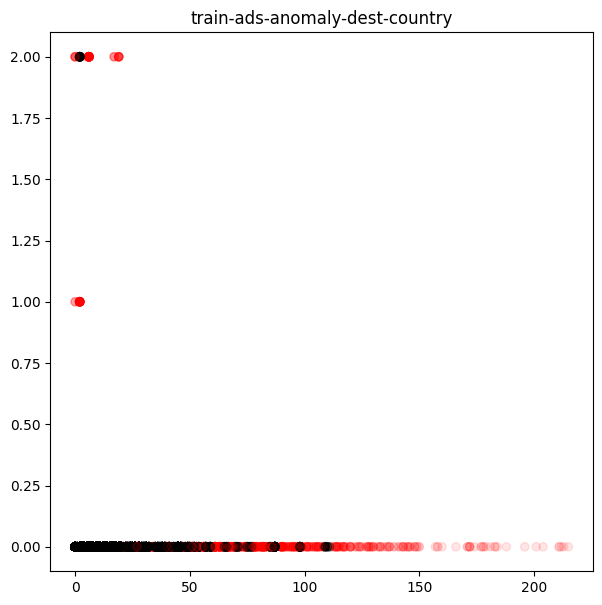

In [41]:
plt.figure(figsize=(7,7))
# plt.scatter(x_scaled[:, 0], x_scaled[:, 0], c=lof_detect, cmap="flag", alpha=0.5)
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=lof_detect, cmap="flag", alpha=0.1)
plt.title("train-ads-anomaly-dest-country")
plt.savefig('images/train-ads-anomaly-dest-country.png')
plt.show()

In [26]:
print("-------------- Machine Learning - Confusion Matrix -------------")
Accuracy = metrics.accuracy_score(X_Test, lof_detect)
print("Accuracy : " , Accuracy)
Precision = metrics.precision_score(X_Test, lof_detect)
print("Precision : " , Precision)
Sensitivity_recall = metrics.recall_score(X_Test, lof_detect)
print("Sensitivity_recall : " , Sensitivity_recall)
Specificity = metrics.recall_score(X_Test, lof_detect, pos_label=-1)
print("Specificity : " , Specificity)
F1_score = metrics.f1_score(X_Test, lof_detect)
print("F1_score : " , F1_score)
print("-------------- Machine Learning - Confusion Matrix -------------")

htmlMatrix = '''
<table class="table table-striped">
    <th>Type</th><th>Meaning</th><th class=right-aligned>Score</th>
    <tr><td>Accuracy</td><td>The proportion of correctly predicted cases</td><td class=right-aligned>''' + str(Accuracy) + '''</td></tr>
    <tr><td>Precision</td><td>Positive Predictive Value</td><td class=right-aligned>''' + str(Precision) + '''</td></tr>
    <tr><td>Sensitivity_recall</td><td> True Positive Rate</td><td class=right-aligned>''' + str(Sensitivity_recall) + '''</td></tr>
    <tr><td>Specificity</td><td>True Negative Rate</td><td class=right-aligned>''' + str(Specificity) + '''</td></tr>
    <tr><td>F1_score</td><td>Balances precision and recall</td><td class=right-aligned>''' + str(F1_score) + '''</td></tr>    
</table>
'''

-------------- Machine Learning - Confusion Matrix -------------
Accuracy :  0.984273722239932
Precision :  0.9847747645808974
Sensitivity_recall :  0.9994003189792664
Specificity :  0.2517763361136855
F1_score :  0.992033638562762
-------------- Machine Learning - Confusion Matrix -------------


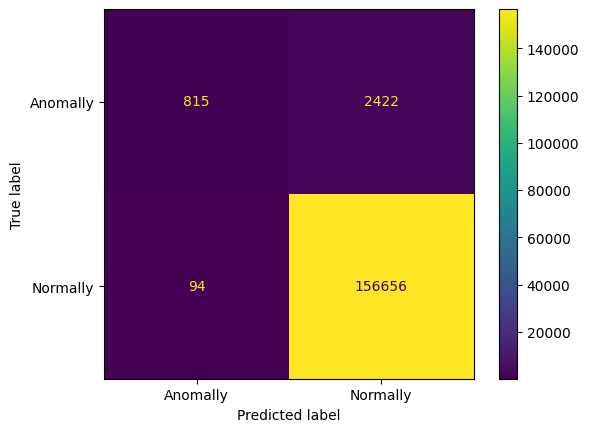

In [27]:
confusion_matrix = metrics.confusion_matrix(X_Test, lof_detect)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Anomally", "Normally"])
cm_display.plot()
plt.savefig('images/matrix.png')
plt.show()

In [38]:
summary_table = '''
<p>Count Record : ''' + str(df_categories.shape[0]) + '''</p>
<h2>Local Outlier Factor (LOF)</h2>
<p>n_neighbors : ''' + str(setNNeighbors) + '''</p>
''' + htmlAnomalyVSNormally + '''
''' + htmlCountryPrediction + '''
''' + htmlCountryPortPrediction + '''
<table class="table table-striped">
<th>Local Outlier Factor (LOF)</th>
<tr>
    <td><img src="train-ads-anomaly-dest-country.png" alt="train-ads-anomaly-dest-country.png"></td>
</tr>
    </table>
<table class="table table-striped">
<th>confusion-matrix</th>
<tr>
    <td><img src="train-ads-anomaly-dest-country-confusion-matrix.png" alt="confusion-matrix"></td>
</tr>
</table>
''' + htmlMatrix + '''
'''

In [39]:
html_string = mainReportHTML("train-ads-anomaly-dest-country-port",summary_table)

In [40]:
f = open('report.html','w')
f.write(html_string)
f.close()

In [17]:
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000
# %set_env MLFLOW_TRACKING_URI=http://mlflow.rtarf-ml.its-software-services.com/
tracking_uri = os.environ["MLFLOW_TRACKING_URI"]
# export MLFLOW_TRACKING_USERNAME=user 
# export MLFLOW_TRACKING_PASSWORD=pwd

experiment = mlflow.set_experiment(experiment_name='ads-anomaly-dest-country-port')
experiment_id = experiment.experiment_id

reportURL = "https://minio-api.rtarf-ml.its-software-services.com/ml-report/train-ads-anomaly-dest-country/" + jenkinsBuildID + "/report.html"

run_description = f"""
### Note
**All information** * about Training * ~~ML here~~
Jenkins URL: [{jenkinsURL}]({jenkinsURL})
Report: [{reportURL}]({reportURL})
"""

with mlflow.start_run(experiment_id=experiment_id,description=run_description):
    mlflow.set_tracking_uri(tracking_uri)
    
    print("Artifact Location: {}".format(experiment.artifact_location))
    print("artifact uri : " + mlflow.get_artifact_uri())

    mlflow.doctor()
    mlflow.log_param("MlflowMinioFolder", mlflowMinioFolder)
    mlflow.log_param("country_key", len(countryMap.keys()))
    mlflow.log_param("country_count", len(set(countryMap.values())))

    mlflow.log_param("SampleFile", xcount)
    mlflow.log_param("SampleRows", X.shape[0])
    # mlflow.set_tag("JenkinsURL",jenkinsURL)

    mlflow.log_metric("Anomaly", str((countDetect[0])*100/(countDetect[0]+countDetect[1])))
    mlflow.log_metric("Normal", str((countDetect[1])*100/(countDetect[0]+countDetect[1])))
    mlflow.sklearn.log_model(lof_detector, "model", registered_model_name="ads-anomaly-by-dest-country")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)


print("-------------- Model save success -------------")

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000


AttributeError: module 'mlflow' has no attribute 'MLFLOW_ARTIFACT_UPLOAD_DOWNLOAD_TIMEOUT'

In [10]:
!mlflow models serve -m mlflow-artifacts:/394149324160139362/f188152b48494d1c86de6a4f8397908d/artifacts/model -p 1234 --no-conda

^C


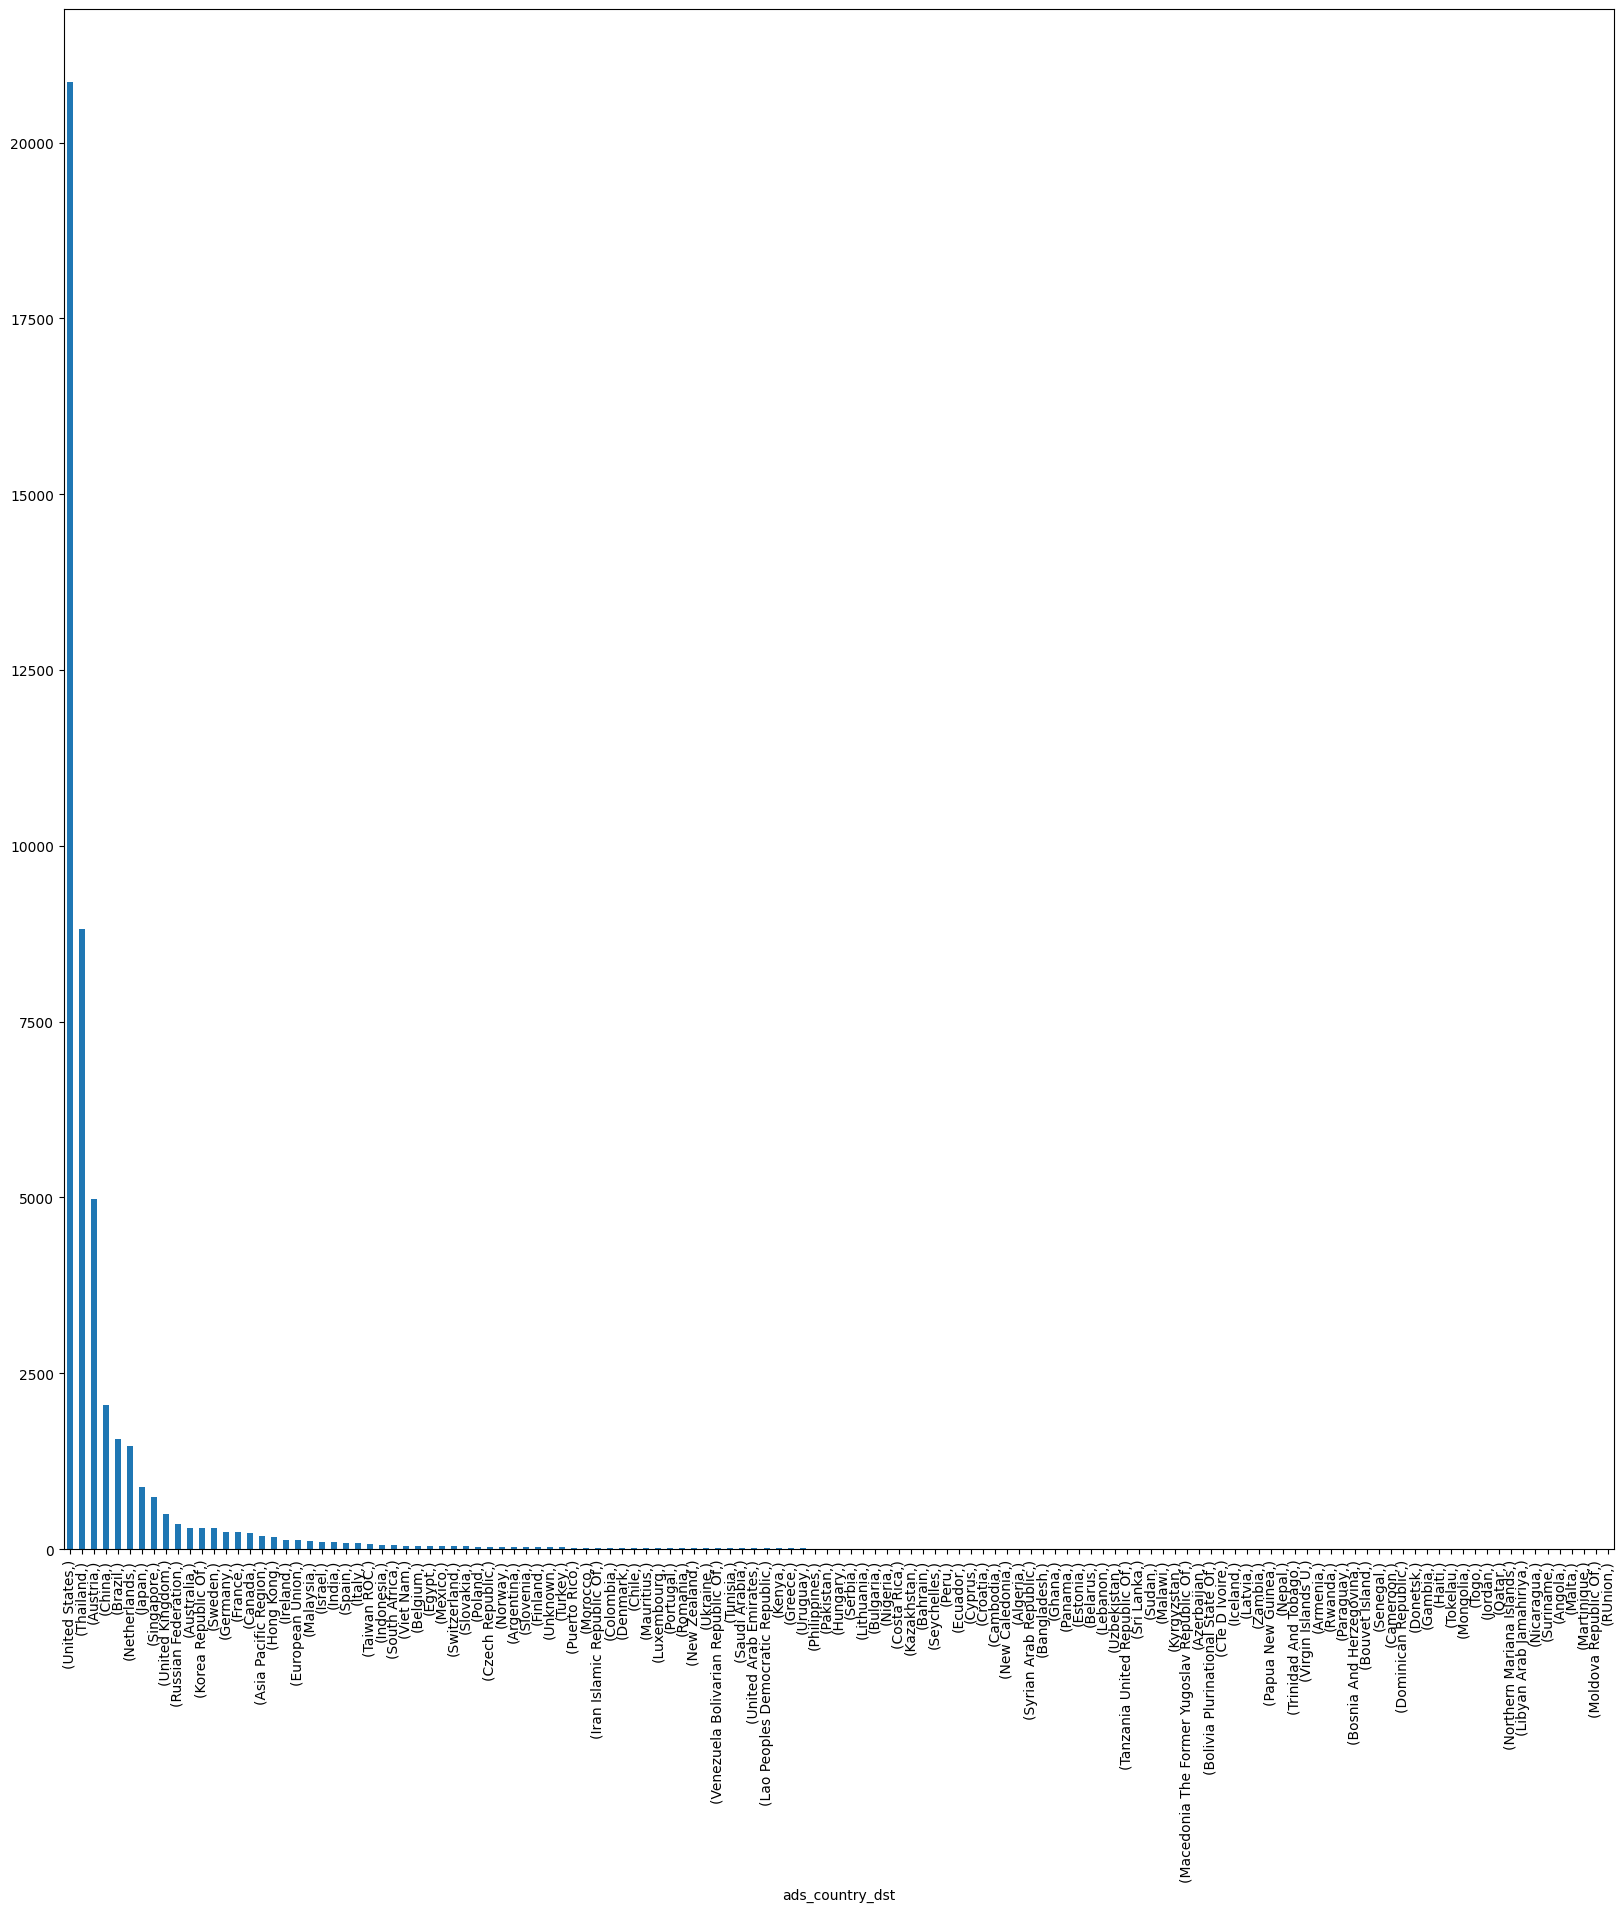

In [ ]:
# Plot the conparison between actual and predicted y
df_categories.value_counts()[: :].plot(kind="bar", figsize=(20,20))
plt.show()